In [2]:
import numpy as np 
from numpy import random
import pandas as pd 
import seaborn as sns
import scipy 
from scipy.stats import chi2
import math
import sys
from scipy.stats import beta
import matplotlib.pyplot as plt

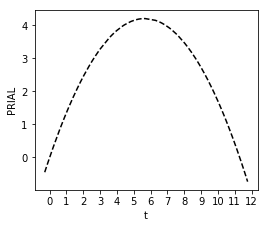

t_max= 0.875
Prial_max 4.209812233351405
t_1 5.646494858742195


In [3]:

p = 25
m = 10
v=min(p,m)
r=100
N=   100 #Monte carlo nb de simulation
"------------Gaussian case-----------"
c=b=1
K_st_st=1
"------------------------------------"

"------------Mixture case------------"
#alpha= p/2 + .1 #alpha > p\2
#Beta=  .00001    #beta > 0
#b=1
#c=(alpha- p/2 ) / (alpha - p/2 + Beta)
#K_st_st=beta.moment(2, alpha, Beta, loc=0, scale=1)
"------------------------------------"

a_Quad_loss = 1 /(K_st_st*( m + p + 1))
t_K_Quad_loss =  ( 2*(p+m-2*v-1)*( (p+m+1)*((c/b)**2) - p - m +v -2 ) )/((p+m - 2*v+1)*(p+m-2*v+3) ) 
t_vec_Quad_loss=np.sort(np.random.uniform(low=-.5*t_K_Quad_loss,high=14*t_K_Quad_loss, size=r))
Prial_K_a_Quad=np.zeros(r)
Loss_Sigma_a_Quad = np.zeros(N) 
Loss_Sigma_K_Quad = np.zeros(N) 
 
#Sigma= np.zeros((p,p))
#rho=0.9
#for ii in range(0,p):
#    for jj in range(0,p):
#        Sigma[ii,jj] = rho**abs(ii-jj)
Sigma=np.identity(p)       
for kk in range(0,r-1):  
    Mean = np.zeros(p)
    for j in range(0,N-1): 
        np.random.seed(N)
        "------------Beta mixture case------------"
        #R=np.sqrt(np.random.beta(alpha, Beta, p));
        #RR=np.tile(R,(m, 1))
        #X=np.random.multivariate_normal(np.zeros(p), Sigma, m)
        #U= np.multiply(X,RR)
        "------------------------------------------"
        
        "------------Gaussian case-----------------"
        U=np.random.multivariate_normal(Mean, Sigma,m )   
        "------------------------------------------"

        S = np.dot(U.T,U) 
        S_plus = np.linalg.pinv(S)                   # The Moore-Penrose inverse
        trace_S_plus = np.matrix.trace(S_plus)       # Trace de S^+
        mu = 1/ trace_S_plus
        [R,V,D] = np.linalg.svd(U)                   # SVD pour U afin de construire S= H L_tilde H^T
        L = np.diag(V*V )                          # Recuperer L
        L_inv= np.linalg.inv(L)  
        H = D.T       
        H1 = H[:,0:v]  
        
        Sigma_hat_a_Quad_loss  =   a_Quad_loss *S 
        
        Phi_K_Quad = L + mu * t_vec_Quad_loss[kk] * np.identity(v)
        
        Sigma_hat_K =  a_Quad_loss  * np.dot( np.dot(H1,Phi_K_Quad), H1.T ) # Estimateur de Konno
    
        Loss_Sigma_K_Quad[j]=np.matrix.trace( ( ( (np.linalg.inv(Sigma))@ (Sigma_hat_K ) )-np.identity(p) ) @  ( ( (np.linalg.inv(Sigma))@ (Sigma_hat_K ) )-np.identity(p) ))
        Loss_Sigma_a_Quad[j] = np.matrix.trace( ( ( (np.linalg.inv(Sigma))@ (Sigma_hat_a_Quad_loss) )-np.identity(p) ) @  ( ( (np.linalg.inv(Sigma))@ (Sigma_hat_a_Quad_loss ) )-np.identity(p) ))
                
    Risk_Sigma_a_Quad=np.mean(Loss_Sigma_a_Quad)
    Risk_Sigma_K_Quad=np.mean(Loss_Sigma_K_Quad)
    
    Prial_K_a_Quad[kk] = 100*( (Risk_Sigma_a_Quad - Risk_Sigma_K_Quad )  / Risk_Sigma_a_Quad)
  
#plt.figure(figsize=(4,3.3))
plt.figure(figsize=(4,3.3))
plt.xticks(np.arange(round(t_vec_Quad_loss.min()), t_vec_Quad_loss.max(), 1) )
plt.yticks(np.arange(round(Prial_K_a_Quad.min()), round(Prial_K_a_Quad.max())+1, 1) )
plt.plot(t_vec_Quad_loss[0:r-1],Prial_K_a_Quad[0:r-1],'k--')


#plt.title('(m,p)=('+str(m)+"," +str(p)+')')
plt.xlabel("t")
plt.ylabel("PRIAL")
#plt.legend()
plt.savefig("plots.pdf")
plt.show()
print("t_max=",t_K_Quad_loss)
print("Prial_max",Prial_K_a_Quad.max())
print("t_1",t_vec_Quad_loss[pd.Series(Prial_K_a_Quad).idxmax()])

In [14]:
t_vec_Quad_loss[pd.Series(Prial_K_a_Quad).idxmax()]

5.714354073681603

In [11]:
t_vec_Quad_loss[92]

11.297510594422919